# **Taller 3: clasificación de especies de iris usando K-vecinos más cercanos.**

**Curso: 09481 - Inteligencia Artificial.**

**Universidad Icesi.**

**Profesor: Breyner Posso.**

**Estudiantes: Julian Bolaños y Juan Pablo Sanín**

# 0. Importar librerías.

In [2]:
#Vamos a importar las librerías que vamos a utilizar.

import pandas as pd                #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos. 
#from google.colab import files     #Esta librería nos sirve para cargar archivos desde el disco duro.

from sklearn.model_selection import train_test_split #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler       #Útil para escalar los atributos de entrada.
from sklearn import neighbors  #Permite usar KNN.
from sklearn import metrics    #Permite calcular algunas métricas de desempeño.

from copy import deepcopy      #Permite hacer copias profundas. 

# 1. Cargar datos.

In [3]:
#Primero vamos a descargar el archivo "iris.csv" en nuestra máquina local desde Moodle o desde esta ruta: https://www.kaggle.com/uciml/iris

#Ahora cargamos en Google Colab el archivo que tiene el conjunto de datos "iris.csv"
#files.upload()  #Nota: si este comando falla, revise que su navegador permite el almacenamiento de cookies. 


In [4]:
#Vamos a utilizar el dataset iris (https://www.kaggle.com/datasets/uciml/iris)
# Vamos a leer el conjunto de datos en un dataframe de pandas.
df = pd.read_csv('iris.csv') #Ruta completa a la ubicación del archivo de interés.

# **EJERCICIOS PROPUESTOS TALLER 3.**

## **Ejercicio 1.**

Para el conjunto de datos iris, ¿cuál sería la exactitud (accuracy) de línea base (baseline)?

En vista de que nuestros datos se encuentran distribuidos de manera uniforme, nuetsro **accuaracy baseline es de 33.33%.**

## **Ejercicio 2.**

Para la función metrics.classification_report consulte qué representan los valores entregados.

<h2> La función metrics.classification_report entrega 4 columnas, precision, recall f1-score y support. <h2/>



Para los ejemplos se utilizará el retorno de las métricas de prueba.

La precisión del modelo hace referencia a ¿qué proporción de todas las predicciones de pertenencia a la clase que hizo el clasificador fueron correctas? Es el resultado de los Verdaderos Positivos/(Verdaderos Positivos+Falsos Positivos) En otras palabras es la estadística que nos dice la calidad del modelo en términos de predecir correctamente para esa clase.

Para el caso que tenemos, podemos observar que para la iris-setosa e iris versicolor la precisión es de 1.00 es decir que el modelo acertó en su totalilad. Finalmente para iris-virginica fue de 0.85, esto nos indica que tuvimos falsos positivos en un 15%.

El recall del modelo o sensibilidad hace referencia a ¿qué proporción de todos los ejemplos que pertenecían a la clase en la realidad, identificó el clasificador? Es el resultado de Verdaderos Positivos/(Verdaderos Positivos+Falsos Negativos) En otras palabras es la estadística que nos informa sobre la cantidad que el modelo es capaz de identificar para esa clase.

Para el caso que tenemos podemos observar que para iris-setosa e iris-virginica es 1.00 es decir que fue capaz de identificar el 100% de los datos pertenecientes a la clase, en ninguna ocasión predijo que no pertenecía cuando en realidad si. Para iris-versicolor el recall fue de 0.82 que nos indica que 18% de los datos fueron identificados como no pertenecientes a esta clase cuando en realidad sí.

La métrica F1-Score del modelo hace referencia a un puntaje que toma en cuenta la precisión y el recall. Este valor esta entre 0 y 1, toma en cuenta los falsos positivos y los falsos negativos. Entre más cercano a 1 mejor será nuestro modelo.

Para el caso que tenemos podemos ver que iris-setosa cuenta con un f1-score de 1.00 es decir que fue perfecto, no identifico ningún falso positivo o negativo. Para iris-virginica e iris-versicolor, su puntaje f1 fue de 0.90 y 0.92 respectivamente.

El support que entrega está función hace referencia a el conteo de datos pertenecientes a cada clase.

<h2> Accuracy <h2/>

El accuracy o exactitud del modelo hace referencia a el porcentaje de caso que acertó el modelo. Es de las métricas más usadas y favoritas, sin embargo, se debe tener cuidado porque no necesariamente indica qué tan bueno es el modelo.

Es el resultado de Verdaderos Positivos + Verdaderos Negativos /(Verdaderos Positivos+ Verdaderos Negativos+ Falsos Positivos + Falsos Negativos)

En nuestro caso, la exactitud es de 0.93, que nos indica que el modelo acierta el 93% de las veces, esto es muy bueno. Sin embargo debemos tener cuidado cuando las clases están desbalanceadas.

## **Ejercicio 3.**

Normalice los atributos, entrene un modelo con los atributos normalizados, pruebe este modelo tanto con los datos de entrenamiento y prueba, obtenga las métricas de desempeño por clase (matriz de confusión, exactitud, precisión, sensibilidad, especificidad y F1), obtenga la exactitud general y compare con los resultados obtenidos mediante el clasificador entrenado en la sesión de Taller.

### Separación atributo-target

Se separan las columnas de nuestro dataframe para tener los atributos en una variable y nuestro target en otra

In [5]:
#Separación de atributos y target
nombre_de_la_variable_de_salida='Species'
nombre_de_las_variables_de_entrada = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']


df_y = pd.get_dummies(df[nombre_de_la_variable_de_salida])
df_x = deepcopy(df[nombre_de_las_variables_de_entrada])

### Normalización

Ahora, se pasa al proceso de normalización de los diferentes atributos. Se empleará la técnica de: ***min - max scaling***

Descripción del método: https://deepchecks.com/glossary/normalization-in-machine-learning/

In [6]:
#Normalización de atributos
df_x_normalized = (df_x-df_x.min())/(df_x.max()-df_x.min())
df_x_normalized

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


### División datos de prueba

Con los atributos normalizados se pasa a dividir los mismos en datos de entrenamiento para el modelo y datos de prueba.

In [7]:
#División de datos en conjunto de entrenamiento y prueba
mezclar_los_datos       = True 
valor_semilla_aleatoria = 5

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.8  
particion_para_pruebas       = 1.0-particion_para_entrenamiento 

df_x_normalized_train, df_x_normalized_test, df_y_train, df_y_test = train_test_split(df_x_normalized, 
                             df_y,
                             test_size=particion_para_pruebas, 
                             random_state=valor_semilla_aleatoria, 
                             shuffle=mezclar_los_datos)

### Entrenamiento con datos normalizados

Se pasa a entrenar un modelo usando los datos recientemente normalizados

In [8]:
k   = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_normalized_train, df_y_train)

KNeighborsClassifier()

In [9]:
#Predicción para datos de entrenamiento
y_pred_train = knn.predict(df_x_normalized_train)
y_pred_train

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0,

In [10]:
#Predicción para datos de prueba
y_pred_test = knn.predict(df_x_normalized_test)
y_pred_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

### Métricas

A continuación se plantean métricas de desempeño por clase para el modelo entrenado con datos normalizados.

Primero se definen una serie de funciones que nos permitirán general mas métricas con mayor facilidad.

In [11]:
y_train = df_y_train.values

def cm_multi (y,y_pred):
  cm_m = metrics.confusion_matrix(one_hot_to_label_encoding(y), one_hot_to_label_encoding(y_pred))
  return cm_m

def one_hot_to_label_encoding(y_one_hot):
  """
  Esta función convierte un arreglo numpy y_one_hot, correspondiente a una matriz de 
  m observaciones por n clases de tipo binario, en un vector columna y_label_encoded
  de m filas cuyos elementos pueden tomar valores entre 0 y n-1. En ese caso
  0 corresponde a la primera categoría, 1 a la segunda categoría, y así
  sucesivamente. 
  """
  rows,cols=y_one_hot.shape            #Obtengo las dimensiones del arreglo.
  y_label_encoded = np.zeros((rows,1)) #Inicializo el arreglo de salida en ceros. 
  for i in range(cols): #Para todas las categorías (aunque estrictamente esto puede dejarse como range(1,cols,1), pues i=0 no hace nada. )
    y_label_encoded += i*y_one_hot[:,i].reshape((-1,1))  #Esto presume que la primera categoría se codifica como 0, 
                                                         #la siguiente como 1, etc...
  return y_label_encoded

#### 1. Matriz de Confusión

Clase 0:
Iris-setosa
Clase 1:
Iris-versicolor
Clase 2:
Iris-virginica


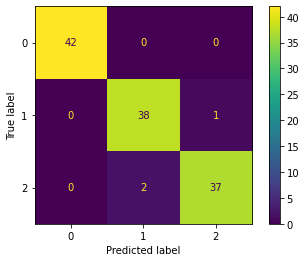

In [12]:
#Matriz de confusión para datos de entrenamiento
cm_train = cm_multi(y_train, y_pred_train)
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train)
disp_1.plot()

for i in range(len(df_y.columns)):
    print('Clase %d:' % i)
    print(df_y.columns[i])

Clase 0:
Iris-setosa
Clase 1:
Iris-versicolor
Clase 2:
Iris-virginica


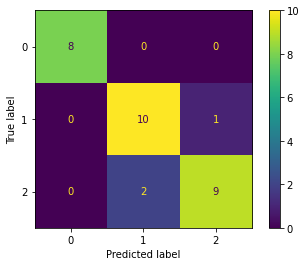

In [13]:
#Matriz de confusión para datos de prueba
y_test = df_y_test.values
cm_test = cm_multi(y_test, y_pred_test)
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test)
disp_1.plot()

for i in range(len(df_y.columns)):
    print('Clase %d:' % i)
    print(df_y.columns[i])

#### 2. Métricas estadísticas

In [14]:
#Métricas estadísticas para datos de entrenamiento
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120



In [15]:
#Métricas estadísticas para datos de prueba
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



#### 3. Exactitud general

In [16]:
y_complete = np.append(y_train, y_test)
y_pred_complete = np.append(y_pred_train, y_pred_test)

accuaracy = metrics.accuracy_score(y_complete, y_pred_complete)
print('Accuaracy of model: ', accuaracy)

Accuaracy of model:  0.9733333333333334


#### 4. Comparación con modelo inicial

Nuestro modelo inicial contaba con una precisión del 98.22%, mientras que este nuevo modelo entrenado con datos normalizados, tuvo una precisión menor: 97.33%

#### 3. Exactitud general

In [17]:
y_complete = np.append(y_train, y_test)
y_pred_complete = np.append(y_pred_train, y_pred_test)

accuaracy = metrics.accuracy_score(y_complete, y_pred_complete)
print('Accuaracy of model: ', accuaracy)

Accuaracy of model:  0.9733333333333334


#### 4. Comparación con modelo inicial

Nuestro modelo inicial contaba con una precisión del 98.22%, mientras que este nuevo modelo entrenado con datos normalizados, tuvo una precisión menor: 97.33%

## **Ejercicio 4:**

Entrene y evalúe clasificadores KNN usando los atributos no normalizados para valores de K={1,3,7,9,11,13,15}. De acuerdo con los resultados obtenidos, ¿qué valor de K recomendaría?. Tenga en cuenta evaluar tanto con los datos de entrenamiento como de prueba.

In [18]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, 
                             df_y,
                             test_size=particion_para_pruebas, 
                             random_state=valor_semilla_aleatoria, 
                             shuffle=mezclar_los_datos)

### K=1

In [19]:
k   = 1  
knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Instanciamos el clasificador KNN.
knn.fit(df_x_train, df_y_train)                #Ajustamos el clasificador. 

#Train predict
y_pred_train = knn.predict(df_x_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=1 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 39  0]
 [ 0  0 39]]


Métricas para K=1 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       1.00      1.00      1.00        39
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=1 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0  9  2]
 [ 0  1 10]]


Métricas para K=1 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
I

### K=3

In [20]:
k   = 3  
knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Instanciamos el clasificador KNN.
knn.fit(df_x_train, df_y_train)                #Ajustamos el clasificador. 

#Train predict
y_pred_train = knn.predict(df_x_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=3 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  2 37]]


Métricas para K=3 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=3 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0  9  2]
 [ 0  0 11]]


Métricas para K=3 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
I

### K=7

In [21]:
k   = 7  
knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Instanciamos el clasificador KNN.
knn.fit(df_x_train, df_y_train)                #Ajustamos el clasificador. 

#Train predict
y_pred_train = knn.predict(df_x_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=7 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  1 38]]


Métricas para K=7 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=7 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


Métricas para K=7 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
I

### K=9

In [22]:
k   = 9  
knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Instanciamos el clasificador KNN.
knn.fit(df_x_train, df_y_train)                #Ajustamos el clasificador. 

#Train predict
y_pred_train = knn.predict(df_x_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=9 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  1 38]]


Métricas para K=9 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=9 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


Métricas para K=9 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
I

### K=11

In [23]:
k   = 11  
knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Instanciamos el clasificador KNN.
knn.fit(df_x_train, df_y_train)                #Ajustamos el clasificador. 

#Train predict
y_pred_train = knn.predict(df_x_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=11 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  1 38]]


Métricas para K=11 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=11 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


Métricas para K=11 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        

### K=13

In [24]:
k   = 13  
knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Instanciamos el clasificador KNN.
knn.fit(df_x_train, df_y_train)                #Ajustamos el clasificador. 

#Train predict
y_pred_train = knn.predict(df_x_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=13 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  1 38]]


Métricas para K=13 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=13 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


Métricas para K=13 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        

### K=15

In [25]:
k   = 15 
knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Instanciamos el clasificador KNN.
knn.fit(df_x_train, df_y_train)                #Ajustamos el clasificador. 

#Train predict
y_pred_train = knn.predict(df_x_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=15 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  1 38]]


Métricas para K=15 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=15 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


Métricas para K=15 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        

### Recomendación

Luego de ver los comportamientos del modelo variando K podemos observar que para 1 y 3 es muy exacto con los datos de entrenamiento, pero al pasar a los de prueba falla. A partir de K=7 hasta K=1  los resultados empiezan a ser iguales y la máxima exactitud se logra, es de 0.97.

Entonces, teniendo en cuenta que los resultados se van repitiendo a partir de K=7 y se obtienen las mejores métricas, recomendaríamos usar K=7.

## **Ejercicio 5:**

Entrene y evalúe clasificadores KNN usando los atributos normalizados para valores de K={1,3,7,9,11,13,15}. De acuerdo con los resultados obtenidos, ¿qué valor de K recomendaría?. Compare los resultados obtenidos en este punto con los obtenidos en el Ejercicio 4. Tenga en cuenta evaluar tanto con los datos de entrenamiento como de prueba.

### K=1

In [26]:
k   = 1  
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_normalized_train, df_y_train)

#Train predict
y_pred_train = knn.predict(df_x_normalized_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_normalized_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=1 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 39  0]
 [ 0  0 39]]


Métricas para K=1 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       1.00      1.00      1.00        39
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=1 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


Métricas para K=1 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
I

### K=3

In [27]:
k   = 3  
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_normalized_train, df_y_train)

#Train predict
y_pred_train = knn.predict(df_x_normalized_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_normalized_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=3 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  2 37]]


Métricas para K=3 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=3 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


Métricas para K=3 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
I

### K=7

In [28]:
k   = 7  
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_normalized_train, df_y_train)

#Train predict
y_pred_train = knn.predict(df_x_normalized_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_normalized_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=7 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  3 36]]


Métricas para K=7 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.93      0.97      0.95        39
 Iris-virginica       0.97      0.92      0.95        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=7 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]


Métricas para K=7 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
I

### K=9

In [29]:
k   = 9 
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_normalized_train, df_y_train)

#Train predict
y_pred_train = knn.predict(df_x_normalized_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_normalized_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=9 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  3 36]]


Métricas para K=9 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.93      0.97      0.95        39
 Iris-virginica       0.97      0.92      0.95        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=9 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


Métricas para K=9 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
I

### K=11

In [30]:
k   = 11 
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_normalized_train, df_y_train)

#Train predict
y_pred_train = knn.predict(df_x_normalized_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_normalized_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=11 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  2 37]]


Métricas para K=11 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=11 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


Métricas para K=11 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        

### K=13

In [31]:
k   = 13 
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_normalized_train, df_y_train)

#Train predict
y_pred_train = knn.predict(df_x_normalized_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_normalized_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=13 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  2 37]]


Métricas para K=13 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=13 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


Métricas para K=13 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        

### K=15

In [32]:
k   = 15 
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_normalized_train, df_y_train)

#Train predict
y_pred_train = knn.predict(df_x_normalized_train)      
y_train= df_y_train.values

cm = metrics.confusion_matrix(one_hot_to_label_encoding(y_train),one_hot_to_label_encoding(y_pred_train))  

#Test predict
y_pred_test = knn.predict(df_x_normalized_test)                                                      
y_test = df_y_test.values

cmt = metrics.confusion_matrix(one_hot_to_label_encoding(y_test),one_hot_to_label_encoding(y_pred_test))  

print("Datos de entrenamiento ")
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')

print('Métricas para K={} usando los datos del conjunto de entrenamiento:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_train),
                                    one_hot_to_label_encoding(y_pred_train),
                                    target_names = df_y.columns))

print("--------------------------------------------------------------------------------------")

print("Datos de prueba ")
print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cmt)
print('\n')

print('Métricas para K={} usando los datos del conjunto de prueba:\n'.format(k))
print(metrics.classification_report(one_hot_to_label_encoding(y_test),
                                    one_hot_to_label_encoding(y_pred_test),
                                    target_names = df_y.columns))


Datos de entrenamiento 
Matriz de confusión para K=15 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  2 37]]


Métricas para K=15 usando los datos del conjunto de entrenamiento:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

--------------------------------------------------------------------------------------
Datos de prueba 
Matriz de confusión para K=15 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


Métricas para K=15 usando los datos del conjunto de prueba:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        

### Recomendación

Luego de ver los comportamientos del modelo variando K podemos observar que para 1 es muy exacto con los datos de entrenamiento, sin embargo, es el k que más falla para los valores de prueba prueba. A partir de K=3 hasta K=15  los resultados empiezan a ser iguales y la máxima exactitud se logra, es de 0.97 para los datos de entrenamiento.

Aún así, K = 7, K = 13 y K = 15, tienen el mejor rendimiento con los valores de prueba 0.94. Por ende se recomienda el uso cualquiera de estos 3 k's para elaborar una predicción en este dataset empleando KNN.

### Comparación Normalizados vs No Normalizados

Al comparar la métrica *accuracy* de los diferentes modelos, se puede ver que para todos los modelos con K > 1 entrenados con los datos no normalizados, se presentan un mejor desempeño que los entrenados con los datos normalizados.

**Datos de entrenamiento**
*accuaracy no normalizados:* 0.98
*accuaracy normalizados:* 0.97

**Datos de prueba**
*accuaracy no normalizados:* 0.97 - 0.93
*accuaracy normalizados:* 0.93 - 0.90

*Nota:* Se excluye al k = 1 de esta comparación porque presenta resultados iguales en ambos modelos y resulta más interesante ver la comparativa entre los diferentes k de los diferentes modelos.

## **Ejercicio 6.**

Encuentre un modelo de clasificación KNN que utilice solo tres atributos y cuyo desempeño sea igual o mejor que el modelo que usa cuatro atributos. Decida si es conveniente normalizar o no los atributos. Utilice diferentes valores de K. Para comparar varios modelos genere diferentes métricas de desempeño.
Al final indique, ¿por qué escogió esos atributos?, de los modelos entrenados ¿cuál escogería y por qué? ¿qué métricas de desempeño reportaría a un cliente y por qué?

## Análisis de los atributos

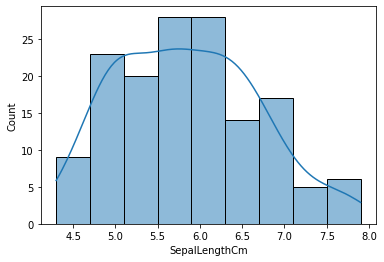

In [33]:
sns.histplot(data=df,
             x='SepalLengthCm',
             kde=True)

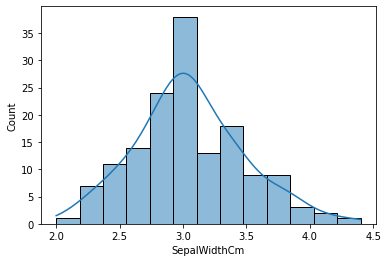

In [34]:
sns.histplot(data=df,
             x='SepalWidthCm',
             kde=True)

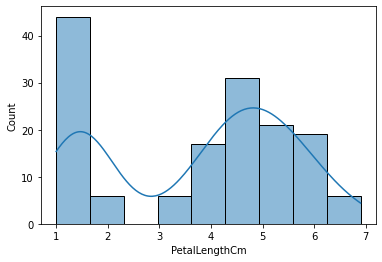

In [35]:
sns.histplot(data=df,
             x='PetalLengthCm',
             kde=True)

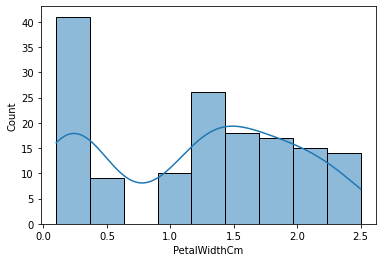

In [36]:
sns.histplot(data=df,
             x='PetalWidthCm',
             kde=True)

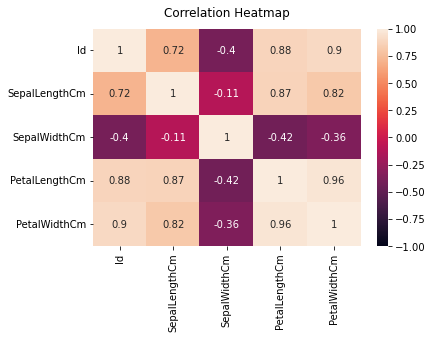

In [37]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

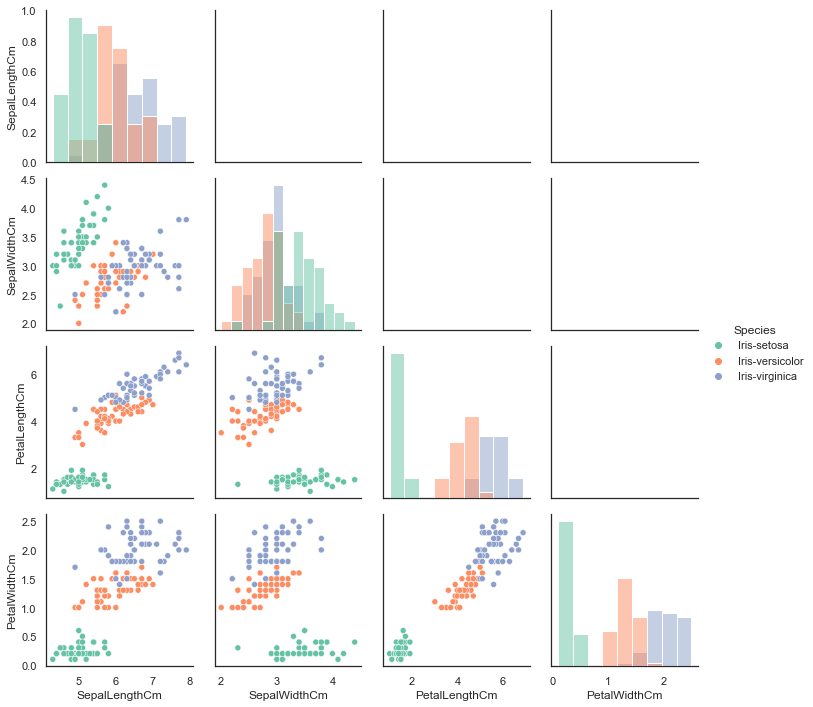

In [38]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df.iloc[:,1:],hue='Species',diag_sharey=False, corner=False)  #Note que no graficamos la columna 0 correspondiente a Id, 
                                                                     #pues no aporta información. Usamos las categorías de la columna de
                                                                     #'Species' para colorear las gráficas.

g.map_diag(sns.histplot) #Muestra el histograma en la diagonal principal.
g.map_lower(sns.scatterplot) #Muestra gráficos de dispersión en la sección inferior izquierda de la matriz.

g.add_legend()

plt.show()

## Definción de Atributos a usar:

Con base a estos resultados podemos ver que SepalWidth tiene una distribución normal y correlaciones débiles con los demás atributos, además en los clusters de SepalWidth vs SepalLength es dificil diferenciar iris-versicolor de iris-virginica, por ende decidimos quitar el atributo de SepalWidth.

In [39]:
df_three= deepcopy(df)
df_three

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
df_three= df_three.drop("SepalWidthCm",axis=1)
df_three

,Id,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,1.4,0.2,Iris-setosa
1,2,4.9,1.4,0.2,Iris-setosa
2,3,4.7,1.3,0.2,Iris-setosa
3,4,4.6,1.5,0.2,Iris-setosa
4,5,5.0,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,146,6.7,5.2,2.3,Iris-virginica
146,147,6.3,5.0,1.9,Iris-virginica
147,148,6.5,5.2,2.0,Iris-virginica
148,149,6.2,5.4,2.3,Iris-virginica


### Selección de atributos

In [41]:
#Nombre de la salida deseada:
nombre_de_la_variable_de_salida='Species' 

#En este primer ejemplo vamos a utilizar 4 variables:
nombre_de_las_variables_de_entrada = ['SepalLengthCm','PetalLengthCm','PetalWidthCm']


df3_y = pd.get_dummies(df_three[nombre_de_la_variable_de_salida])
nombres_de_las_variables_de_salida = df3_y.columns.to_list()
print('Nombres de las nuevas columnas: ',nombres_de_las_variables_de_salida,'\n')
print('Dataframe de salida:')
print(df3_y)

#Ahora, obtenemos un dataframe con las variables de entrada que vamos a utilizar.
df3_x = deepcopy(df_three[nombre_de_las_variables_de_entrada])
print('\nDataframe de entrada:')
print(df3_x)

Nombres de las nuevas columnas:  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 

Dataframe de salida:
     Iris-setosa  Iris-versicolor  Iris-virginica
0              1                0               0
1              1                0               0
2              1                0               0
3              1                0               0
4              1                0               0
..           ...              ...             ...
145            0                0               1
146            0                0               1
147            0                0               1
148            0                0               1
149            0                0               1

[150 rows x 3 columns]

Dataframe de entrada:
     SepalLengthCm  PetalLengthCm  PetalWidthCm
0              5.1            1.4           0.2
1              4.9            1.4           0.2
2              4.7            1.3           0.2
3              4.6            1.5           0.2
4   

### División de datos

In [42]:
mezclar_los_datos       = True 
valor_semilla_aleatoria = 5   


particion_para_entrenamiento = 0.8  
particion_para_pruebas       = 1.0-particion_para_entrenamiento


df3_x_train, df3_x_test, df3_y_train, df3_y_test = train_test_split(df3_x,                                   
                                                              df3_y,                                       
                                                              test_size=particion_para_pruebas, 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=mezclar_los_datos)

print('-----------------------------------------------------------------------')
print('Conjunto de datos de entrenamiento {:1.0f}%'.format(particion_para_entrenamiento*100))
print('-----------------------------------------------------------------------')
print(df3_x_train.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de prueba {:1.0f}%'.format(particion_para_pruebas*100))
print('-----------------------------------------------------------------------')
print(df3_x_test.info(),'\n',sep='')

-----------------------------------------------------------------------
Conjunto de datos de entrenamiento 80%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 39 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  120 non-null    float64
 1   PetalLengthCm  120 non-null    float64
 2   PetalWidthCm   120 non-null    float64
dtypes: float64(3)
memory usage: 3.8 KB
None 

-----------------------------------------------------------------------
Conjunto de datos de prueba 20%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 82 to 132
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  30 non-null     float64
 1   PetalLengthCm  30 non-null   

### KNN

In [43]:
k   = 7 
knn = neighbors.KNeighborsClassifier(n_neighbors=k) 
knn.fit(df3_x_train, df3_y_train)     

#Train
y3_pred_train = knn.predict(df3_x_train) 
y3_train = df3_y_train.values

#Test
y3_pred_test = knn.predict(df3_x_test) 
y3_test = df3_y_test.values

Matriz de confusión para K=7 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 38  1]
 [ 0  1 38]]


Clase 0:
Iris-setosa
Clase 1:
Iris-versicolor
Clase 2:
Iris-virginica


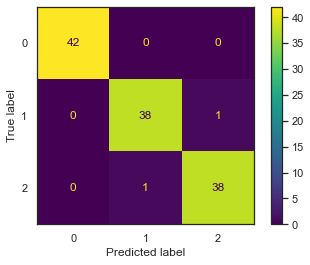

In [44]:
cm = metrics.confusion_matrix(one_hot_to_label_encoding(y3_train),one_hot_to_label_encoding(y3_pred_train))  #Una matriz de confusión para todas las categorías.  
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp_1.plot()

for i in range(len(nombres_de_las_variables_de_salida)):
    print('Clase %d:' % i)
    print(nombres_de_las_variables_de_salida[i])

Matriz de confusión para K=7 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


Clase 0:
Iris-setosa
Clase 1:
Iris-versicolor
Clase 2:
Iris-virginica


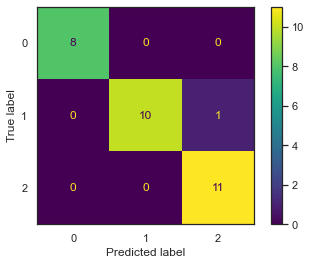

In [45]:
cm_test= metrics.confusion_matrix(one_hot_to_label_encoding(y3_test),one_hot_to_label_encoding(y3_pred_test)) 

print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cm_test)
print('\n')
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test)
disp_1.plot()

for i in range(len(nombres_de_las_variables_de_salida)):
    print('Clase %d:' % i)
    print(nombres_de_las_variables_de_salida[i])

### Metrics Train

In [46]:
print(metrics.classification_report(one_hot_to_label_encoding(y3_train),
                                    one_hot_to_label_encoding(y3_pred_train),
                                    target_names = nombres_de_las_variables_de_salida))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120



### Metrics Test

In [63]:
print(metrics.classification_report(one_hot_to_label_encoding(y3_test),
                                    one_hot_to_label_encoding(y3_pred_test),
                                    target_names = nombres_de_las_variables_de_salida))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Exactitud general

In [48]:
y_complete = np.append(y3_train, y3_test)
y_pred_complete = np.append(y3_pred_train, y3_pred_test)

accuaracy = metrics.accuracy_score(y_complete, y_pred_complete)
print('Accuaracy of model: ', accuaracy)

Accuaracy of model:  0.9866666666666667


### Conclusiones

Luego de implementar este modelo con tres atributos, nos dieron resultados iguales y mejores que los del modelo de cuatro atributos, decidimos no normalizar ya que nos dieron peores resultados cuando lo hicimos. Probamos con diferentes valores de K y los resultados obtenidos por K=7 siguen la tendencia de los ejercicios 4 y 5. Las métricas de desempeños nos indica que el modelo mejoró y cabe resaltar que la precisión del modelo aumentó en 0.44% aproximadamente. Los atributos fueron elejidos con base al análisis hecho anteriormente donde se observaban correlaciones fuertes y agrupaciones distinguidas para estos atributos. Con esto pudimos decidir sacar el atributo "SepalWidthCm". 

Para presentarle a un cliente sería de suma importancia presentar la precisión del modelo, resaltar todas las métricas de 100% en iris-setosa y finalmente mostrar las diferencias con el modelo de cuatro atributos.

## **Ejercicio 7.**

Encuentre un modelo de clasificación KNN que utilice solo dos atributos y cuyo desempeño sea comparable con el modelo que usa cuatro atributos. Decida si es conveniente normalizar o no los atributos. Utilice diferentes valores de K. Para comparar varios modelos genere diferentes métricas de desempeño.
Al final indique, ¿por qué escogió esos atributos?, de los modelos entrenados ¿cuál escogería y por qué? ¿qué métricas de desempeño reportaría a un cliente y por qué?

Para este ejercicio se empleará el mismo análisis de atributos del ejercicio anterior. Al igual que se extenderán algunas observaciones hechas en el mismo.

## Definción de Atributos a usar:

1. Como se mencionó en el punto anterior: SepalWidth tiene una distribución normal y correlaciones débiles con los demás atributos, además en los clusters de SepalWidth vs SepalLength es dificil diferenciar iris-versicolor de iris-virginica, por ende **decidimos quitar el atributo de SepalWidth**.



2. En vista de que PetalWidth y Petal length tienen una correlación muy fuerte, se plantea usar este par de variables para entrenar un nuevo modelo. Por ende, **decidimos quitar el atributo de SepalLength**

In [54]:
df_two = deepcopy(df)
df_two

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
df_two = df_two.drop("SepalWidthCm",axis=1)
df_two = df_two.drop("SepalLengthCm",axis=1)
df_two

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa
...,...,...,...,...
145,146,5.2,2.3,Iris-virginica
146,147,5.0,1.9,Iris-virginica
147,148,5.2,2.0,Iris-virginica
148,149,5.4,2.3,Iris-virginica


### Selección de atributos

In [56]:
#Nombre de la salida deseada:
nombre_de_la_variable_de_salida='Species' 

#En este primer ejemplo vamos a utilizar 4 variables:
nombre_de_las_variables_de_entrada = ['PetalLengthCm','PetalWidthCm']


df2_y = pd.get_dummies(df_three[nombre_de_la_variable_de_salida])
nombres_de_las_variables_de_salida = df2_y.columns.to_list()
print('Nombres de las nuevas columnas: ',nombres_de_las_variables_de_salida,'\n')
print('Dataframe de salida:')
print(df2_y)

#Ahora, obtenemos un dataframe con las variables de entrada que vamos a utilizar.
df2_x = deepcopy(df_three[nombre_de_las_variables_de_entrada])
print('\nDataframe de entrada:')
print(df2_x)

Nombres de las nuevas columnas:  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 

Dataframe de salida:
     Iris-setosa  Iris-versicolor  Iris-virginica
0              1                0               0
1              1                0               0
2              1                0               0
3              1                0               0
4              1                0               0
..           ...              ...             ...
145            0                0               1
146            0                0               1
147            0                0               1
148            0                0               1
149            0                0               1

[150 rows x 3 columns]

Dataframe de entrada:
     PetalLengthCm  PetalWidthCm
0              1.4           0.2
1              1.4           0.2
2              1.3           0.2
3              1.5           0.2
4              1.4           0.2
..             ...           ...
145          

### División de datos

In [57]:
mezclar_los_datos       = True 
valor_semilla_aleatoria = 5   


particion_para_entrenamiento = 0.8  
particion_para_pruebas       = 1.0-particion_para_entrenamiento


df2_x_train, df2_x_test, df2_y_train, df2_y_test = train_test_split(df2_x,                                   
                                                              df2_y,                                       
                                                              test_size=particion_para_pruebas, 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=mezclar_los_datos)

print('-----------------------------------------------------------------------')
print('Conjunto de datos de entrenamiento {:1.0f}%'.format(particion_para_entrenamiento*100))
print('-----------------------------------------------------------------------')
print(df2_x_train.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de prueba {:1.0f}%'.format(particion_para_pruebas*100))
print('-----------------------------------------------------------------------')
print(df2_x_test.info(),'\n',sep='')

-----------------------------------------------------------------------
Conjunto de datos de entrenamiento 80%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 39 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PetalLengthCm  120 non-null    float64
 1   PetalWidthCm   120 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB
None 

-----------------------------------------------------------------------
Conjunto de datos de prueba 20%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 82 to 132
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PetalLengthCm  30 non-null     float64
 1   PetalWidthCm   30 non-null     float64
dtypes: float64(2)
memory usage: 7

### KNN

En vista de que con los ejercicios 4 y 5 se pudo ver que no existía un motivo de peso para emplear datos normalizado en el entrenamiento y prueba del modelo, a continuación se emplearán datos no normalizados y un valor de k= 7, el cual presentó un desempeño adecuado en preuebas anteriores.

In [58]:
k   = 7 
knn = neighbors.KNeighborsClassifier(n_neighbors=k) 
knn.fit(df2_x_train, df3_y_train)     

#Train
y2_pred_train = knn.predict(df2_x_train) 
y2_train = df2_y_train.values

#Test
y2_pred_test = knn.predict(df2_x_test) 
y2_test = df2_y_test.values

Matriz de confusión para K=7 usando los datos del conjunto de entrenamiento:
 [[42  0  0]
 [ 0 37  2]
 [ 0  2 37]]


Clase 0:
Iris-setosa
Clase 1:
Iris-versicolor
Clase 2:
Iris-virginica


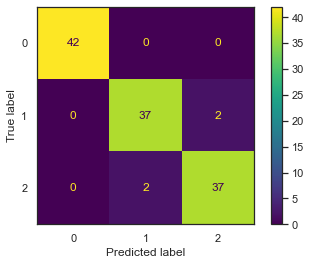

In [59]:
cm = metrics.confusion_matrix(one_hot_to_label_encoding(y2_train),one_hot_to_label_encoding(y2_pred_train))  #Una matriz de confusión para todas las categorías.  
print('Matriz de confusión para K={} usando los datos del conjunto de entrenamiento:\n'.format(k), cm)
print('\n')
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp_1.plot()

for i in range(len(nombres_de_las_variables_de_salida)):
    print('Clase %d:' % i)
    print(nombres_de_las_variables_de_salida[i])

Matriz de confusión para K=7 usando los datos del conjunto de prueba:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


Clase 0:
Iris-setosa
Clase 1:
Iris-versicolor
Clase 2:
Iris-virginica


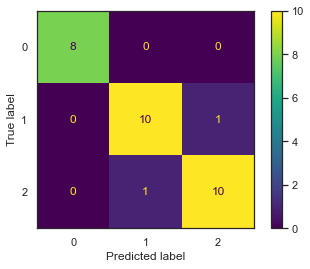

In [60]:
cm_test= metrics.confusion_matrix(one_hot_to_label_encoding(y2_test),one_hot_to_label_encoding(y2_pred_test)) 

print('Matriz de confusión para K={} usando los datos del conjunto de prueba:\n'.format(k), cm_test)
print('\n')
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test)
disp_1.plot()

for i in range(len(nombres_de_las_variables_de_salida)):
    print('Clase %d:' % i)
    print(nombres_de_las_variables_de_salida[i])

### Metrics Train

In [61]:
print(metrics.classification_report(one_hot_to_label_encoding(y2_train),
                                    one_hot_to_label_encoding(y2_pred_train),
                                    target_names = nombres_de_las_variables_de_salida))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.95      0.95        39
 Iris-virginica       0.95      0.95      0.95        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120



### Metrics Test

In [62]:
print(metrics.classification_report(one_hot_to_label_encoding(y2_test),
                                    one_hot_to_label_encoding(y2_pred_test),
                                    target_names = nombres_de_las_variables_de_salida))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



### Exactitud general

In [64]:
y_complete = np.append(y2_train, y2_test)
y_pred_complete = np.append(y2_pred_train, y2_pred_test)

accuaracy = metrics.accuracy_score(y_complete, y_pred_complete)
print('Accuaracy of model: ', accuaracy)

Accuaracy of model:  0.9733333333333334


### Conclusiones

Al implementar nuestro modelo de predicción usando únicamente 2 atributos, un k = 7 y datos no normalizados, podemos ver lo siguiente:

- Emplear variables que tienen una alta correlación entre sí nos pérmitió alcanzar un desempeño **muy similar** al que alcanzaba el modelo original con todos los atributos. Incluso se presentaron resultados con peor desempeño usando todos los atributos para algunos valores de k.

- Se sigue la tendencia mencionada en los punto 4 y 5

- Al analizar las métricas podemos ver que a pesar de que el modelo disminuyó un poco su precisión, se mantiene un desempeño cercano al de la mayoría de modelo entrenados.
 

Al presentar con un cliente nuestro modelo lo más pertinente sería mencionar su exactitud general y hacer la comparación con los diferentes modelos que emplean mayor cantidad de atributos y, en los cuales, muchos presentan un desempeño peor. 

A este apartado de dimensionalidad se le podría aportar de que, dada la naturaleza de nuestro modelo (KNN), resulta más conveniente manejar un menor número de atributos ya que el modelo almacenaría todo el conjunto de datos, por ende, si de costos computacionales se trata, esta alternativa dismuiría los costos del cliente.

## **Ejercicio 8.**

¿Qué valores puede tomar el hiperparámetro metric? ¿Cuál es la distancia que utiliza por defecto el clasificador KNN?
¿Qué valores puede tomar el hiperparámetro weight y cuál podría ser su utilidad?

El hiperparámetro metric recibe un str, sin embargo esta cadena debe estar asociada a una métrica de distancia establecida. Los valores que puede tomar son: 

Para espacios de vectores con valores reales:

*   euclidean
*   manhattan
*   chebyshev
*   minkowski
*   wminkowski
*   seuclidean
*   mahalanobid

Para espacios de vectores con dos dimensiones:

*   haversine

Para espacios de vectores con valores enteros:

*   hamming
*   canberra
*   braycurtis

**Por defecto se usa la minkowski**

El hiperparámetro weight puede tomar valores de:

*   uniform: Todos los puntos tienen pesos iguales
*   distance: Puntos de peso por el inverso de su distancia, los vecinos más cercanos tendrán una mayor influencia que aquellos más lejanos.
*   callable: el usuario define una función para la distancia

**Por defecto se usa uniform**

Es útil utilizar este hiperparámetro cuando se desea personalizar la agrupación a través de funciones propias y también para cuando se quiera que la distancia tenga influencia sobre la agrupación.





# **FIN**

# **Metodología**

1. Desarrolle las Preguntas propuestas en el Taller 3 de forma individual.

2. Después de la sesión de Taller 3, suba a Intu el archivo con la solución a las preguntas con nombre en el siguiente formato:

Taller_3_Apellido-Nombre.ipynb

3. Resuelva los Ejercicios Propuestos (en grupos de máximo 2 personas) en un nuevo notebook de Jupyter y suba el archivo a Intu hasta el próximo miércoles 21 de septiembre a las 7:00 am (antes del inicio de la clase). Utilice el siguiente formato para el nombre del archivo.

Ejercicios_Taller_2_Apellido-Nombre_Apellido-Nombre.ipynb

4.	Recuerde consignar los nombres de los integrantes dentro del notebook.

5.	Algunos grupos serán llamados al azar durante la clase del miércoles 21 de septiembre para realizar la presentación de alguno (s) de los puntos.

6. La nota del Taller 3 se asignará así:

- Preguntas Taller 2 (20%)

- Ejercicios Taller 2 (80%)
